<html>
<head>
<style>
body {
  font-size: 14px;
}
</style>
</head>
<body>
<h1 style="text-align: center;">House price prediction - Linear regression model with sklearn in Python</h1>
<p style="text-align: center;">by Luis Alonso Copete</p>

<hr>

<p><strong>Description:</strong></p>
<p>This project aims to predict housing prices based on square footage using linear regression. The dataset consists of housing data with features such as square meters and corresponding prices. The goal is to build a regression model that can accurately predict housing prices based on square footage.</p>

<p><strong>Objectives:</strong></p>
<ol>
<li>Build a univariable linear regression model using square footage as the independent variable and housing price as the dependent variable.</li>
<li>Train the model using the housing dataset that includes features such as square meters and corresponding prices.</li>
<li>Evaluate the accuracy and performance of the linear regression model using metrics such as the coefficient of determination (R2) and mean squared error (MSE).</li>
</ol>

</body>
</html>




### Question
What is the coefficient of determination (R2) and mean squared error (MSE) of our linear regression model that uses square footage as a feature to predict house prices?

### Import libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression

### Load dataset

'price' and 'sqft_living' were select as depending and independing columns. After 'sqft_living' were transformed to square meters.

In [39]:
df = pd.read_csv('house_data.csv', usecols=['price', 'sqft_living'])
#Convert square foots to square meters
df['sq_meter'] = df['sqft_living']/10.764
#Reduce decimals
df['price'] = df['price'].round(2)
df['sq_meter'] = df['sq_meter'].round(2)
df = df.drop(columns='sqft_living') #drop column
df.head()

,price,sq_meter
0,313000.0,124.49
1,2384000.0,339.09
2,342000.0,179.30
3,420000.0,185.80
4,550000.0,180.23


Creation of heatmap to check null values

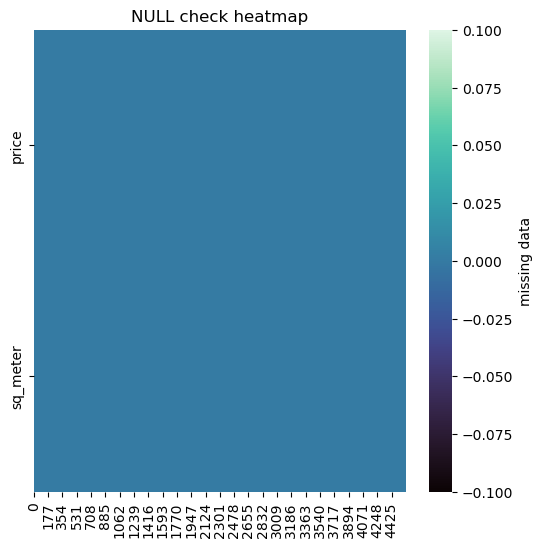

In [40]:
#Create heatmap with Seaborn to view nulls.
plt.figure(figsize=(6,6))
sns.heatmap(df.isna().transpose(), cmap = "mako", cbar_kws = {"label":"missing data"})
plt.title('NULL check heatmap')
plt.show()

Histograms and Boxplot were created to check data distribution. After this were founds outliers.

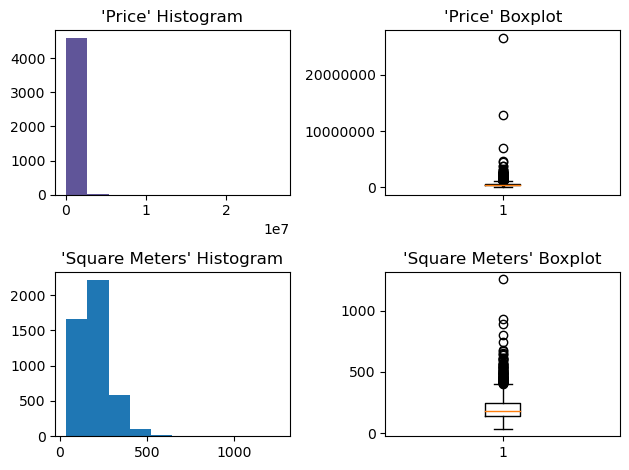

In [41]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color='#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")

axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")
axs[0, 1].ticklabel_format(style='plain', axis='y')

axs[1, 0].hist(df['sq_meter'])
axs[1, 0].set_title("'Square Meters' Histogram")

axs[1, 1].boxplot(df['sq_meter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()


When plotting a scatter chart, are identifieds some outliers. 

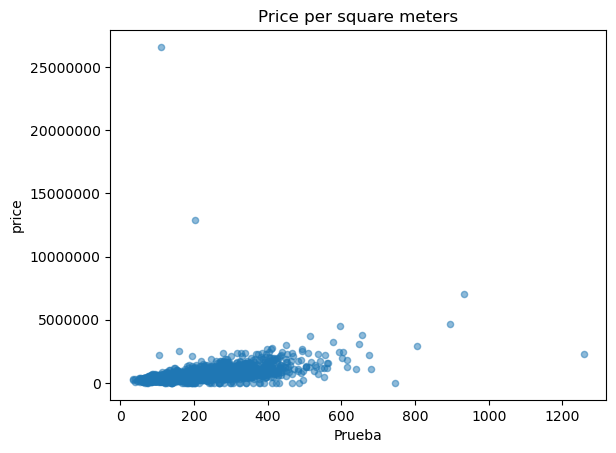

In [42]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

It is decided to drop ouliers as possible, calculating interquartile range and fence values


$$ \text{IQR} = Q3 - Q1 $$

$$ \text{Lower Fence} = Q1 - 1.5 \times \text{IQR} $$

$$ \text{Upper Fence} = Q3 + 1.5 \times \text{IQR} $$


Because the Lower Fence for price was a negative value, it is decide to change it to 0

In [43]:
#Delete 'Price' outliers
q25, q75 = np.percentile(df['price'], [25, 75])
iqr_price = stats.iqr(df['price']) 
print('IQR:', iqr_price)
inf_price = q25 - (1.5*iqr_price)
up_price = q75 + (1.5*iqr_price) 
print(f'Lower Fence: {inf_price}, Upper Fence: {up_price}')
df = df[(df['price'] > 0) 
        & (df['price'] < up_price)]

IQR: 332087.5
Lower Fence: -175256.25, Upper Fence: 1153093.75


In [44]:
#Delete 'sq_meter' outliers
q25, q75 = np.percentile(df['sq_meter'], [25, 75])
iqr_meter = stats.iqr(df['sq_meter'])
print('IQR:', iqr_meter) 
inf_meter = q25 - (1.5*iqr_meter) 
up_meter = q75 + (1.5*iqr_meter) 
print(f'Lower Fence: {inf_meter}, Upper Fence: {up_meter}')
df = df[(df['sq_meter'] > inf_meter) 
        & (df['sq_meter'] < up_meter)]

IQR: 100.33000000000001
Lower Fence: -17.64500000000001, Upper Fence: 383.675


Checked the distribution again and a better normalization was found.

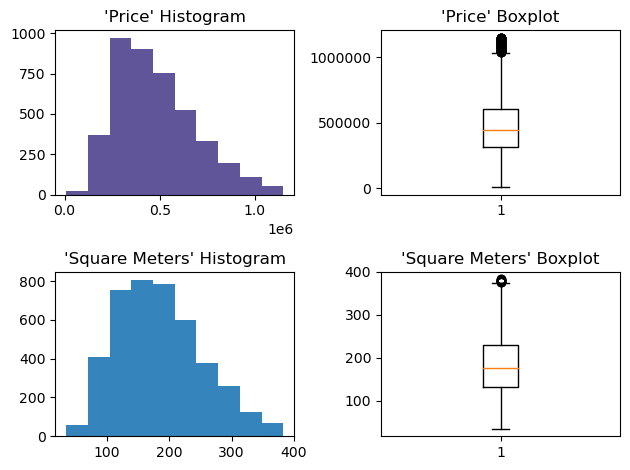

In [45]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color = '#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")

axs[1, 0].hist(df['sq_meter'], alpha=0.9)
axs[1, 0].set_title("'Square Meters' Histogram")
axs[1, 1].boxplot(df['sq_meter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()

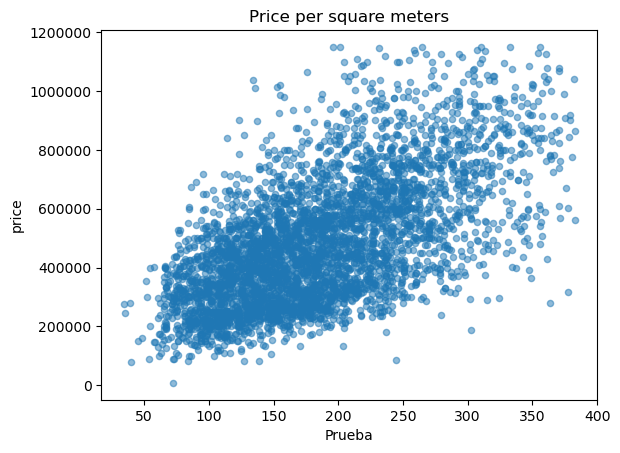

In [46]:
df.plot(x='sq_meter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Prueba')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Model training

The 70% of dataset was asiggned to training and 30% to test.

In [47]:
training = df.sample(frac=0.7, random_state=25)
test = df.drop(training.index)

print(f'Number of training dataset: {training.shape[0]}')
print(f'Number of training dataset: {test.shape[0]}')

Number of training dataset: 2965
Number of training dataset: 1271


Save datasets

In [48]:
training.to_csv('training.csv', index=False)
test.to_csv('test.csv', index=False)

In [49]:
x_train = np.array(training['sq_meter']).reshape(-1, 1)
y_train = np.array(training['price']).reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

Testing de trained model with the 'test' dataframe

In [50]:
test['price_predicted'] = reg.predict(np.array(test['sq_meter']).reshape(-1,1))

test.head()

,price,sq_meter,price_predicted
0,313000.0,124.49,367703.473600
7,482000.0,251.77,611705.664447
12,588500.0,216.46,544014.610403
13,365000.0,101.26,323170.389899
17,367500.0,288.93,682943.261964


Graphing the linear regression rect

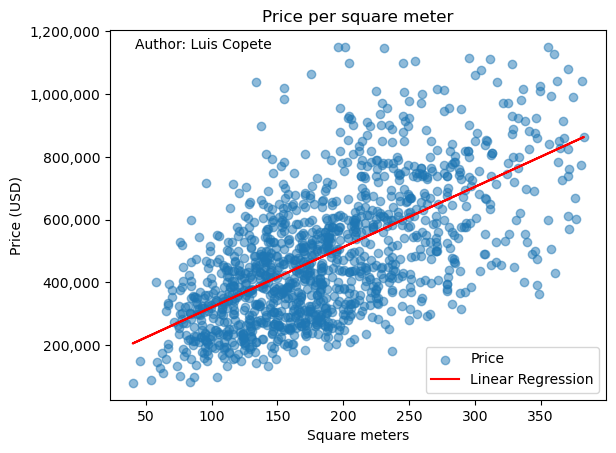

In [51]:
fig, ax = plt.subplots()


ax.scatter(test['sq_meter'], test['price'], alpha=0.5, label='Price')
ax.plot(test['sq_meter'], test['price_predicted'], color='red', label='Linear Regression')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('Price per square meter')
plt.xlabel('Square meters')
plt.ylabel('Price (USD)')


plt.legend()
plt.text(0.05, 0.95, 'Author: Luis Copete', transform=ax.transAxes, fontsize=10)


plt.show()


### R2 and MSE

It used the r2_score module to evaluate the r2 coefficient.

In [52]:
from sklearn.metrics import r2_score

# Assuming y_val is original data and f_val is predicted value
y_val = test['price']
f_val = test['price_predicted']

r2 = r2_score(y_val, f_val)
print('The R2 Score for the model is: {:.2f}'.format(r2))

if r2 < 0.3:
    print("The model has a poor fit and cannot explain the variability of the data well.")
elif r2 < 0.5:
    print("The model has a moderate fit and can partially explain the variability of the data.")
elif r2 < 0.7:
    print("The model has a reasonable fit and can explain a good portion of the data variability.")
elif r2 < 0.9:
    print("The model has a good fit and can explain most of the data variability.")
else:
    print("The model has an excellent fit and can explain almost all of the data variability.")



The R2 Score for the model is: 0.38
The model has a moderate fit and can partially explain the variability of the data.


It used the mean_squared_error module to evaluate MSE

In [54]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, f_val)
print('The mean squared error is: ', mse)

if mse == 0:
    print("Perfect prediction - The predicted values perfectly match the actual values.")
elif 0 < mse < 0.5:
    print("Excellent prediction - The model has very low error and can accurately predict the target variable.")
elif 0.5 <= mse < 1:
    print("Good prediction - The model has a moderate level of error but still provides reasonably accurate predictions.")
elif 1 <= mse < 5:
    print("Fair prediction - The model has a relatively higher level of error, indicating some deviation from the actual values.")
else:
    print("Poor prediction - The model has a high level of error, suggesting significant discrepancies between the predicted and actual values.")


The mean squared error is:  27260524396.46722
Poor prediction - The model has a high level of error, suggesting significant discrepancies between the predicted and actual values.
